## Exploratory Data Analysis

#### Import Statements

In [1]:
# import statements
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import requests
import numpy as np
import json
import folium
from folium.plugins import MarkerCluster

#### Reading in Data and Dataframe Creation for the Year 2023

In [2]:
# import data and create pandas dataframe
# data from the entire year of 2023
path = "/Users/miagironda/Bike_Optimization_Project/data/"
extension = ".csv"
files = [file for file in os.listdir(path) if file.endswith(extension)]
dfs = []
for file in files:
    df = pd.read_csv(os.path.join(path, file))
    dfs.append(df)

# concatenate all dataframes in the list into a single dataframe
combined_df = pd.concat(dfs, ignore_index = True)

/var/folders/c6/ncmjfts16hg41j9p86bp3fsc0000gn/T/ipykernel_29763/2630369335.py:8: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, file))
/var/folders/c6/ncmjfts16hg41j9p86bp3fsc0000gn/T/ipykernel_29763/2630369335.py:8: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, file))


#### Dataframe Manipulation and Cleaning

In [3]:
# drop irrelevant columns
combined_df = combined_df.drop(columns = ["Number", "Start station number", "End station number", "Bike number", "Bike model", "Total duration", "Total duration (ms)"])

# display df
display(combined_df)

,Start date,Start station,End date,End station
0,2023-09-30 23:59,"Commercial Street, Shoreditch",2023-10-01 00:08,"Shoreditch Court, Haggerston"
1,2023-09-30 23:59,"Moor Street, Soho",2023-10-01 01:02,"Stratford Station, Stratford"
2,2023-09-30 23:59,"Moor Street, Soho",2023-10-01 01:04,"Stratford Station, Stratford"
3,2023-10-01 00:00,"Baylis Road, Waterloo",2023-10-01 00:06,"Lambeth Road, Vauxhall"
4,2023-09-30 23:59,"London Street, Paddington",2023-10-01 00:16,"Kensington Olympia Station, Olympia"
...,...,...,...,...
7670004,2023-05-29 00:00,"South Kensington Station, South Kensington",2023-05-29 00:03,"Sloane Avenue, Knightsbridge"
7670005,2023-05-29 00:00,"Exhibition Road, Knightsbridge",2023-05-29 00:14,"Hammersmith Road, Hammersmith"
7670006,2023-05-29 00:00,"Kennington Lane Rail Bridge, Vauxhall",2023-05-29 00:03,"Black Prince Road, Vauxhall"
7670007,2023-05-29 00:00,"Pitfield Street North,Hoxton",2023-05-29 00:04,"Eagle Wharf Road, Hoxton"


In [4]:
# print df info
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670009 entries, 0 to 7670008
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Start date     object
 1   Start station  object
 2   End date       object
 3   End station    object
dtypes: object(4)
memory usage: 234.1+ MB
None


In [5]:
# change "Start date" and "End date" to pandas datetime 
combined_df = combined_df.assign(**{
    "Start date": pd.to_datetime(combined_df["Start date"]),
    "End date": pd.to_datetime(combined_df["End date"])
})

# sorting data by "Start date"
combined_df = combined_df.sort_values(by = ["Start date"])

# reset index
combined_df = combined_df.reset_index(drop = True)

# display df
display(combined_df)

,Start date,Start station,End date,End station
0,2023-01-02 00:00:00,"Hyde Park Corner, Hyde Park",2023-01-02 00:21:00,"Pennington Street, Wapping"
1,2023-01-02 00:00:00,"Dunston Road , Haggerston",2023-01-02 00:20:00,"Antill Road, Mile End"
2,2023-01-02 00:01:00,"Sackville Street, Mayfair",2023-01-02 00:24:00,"Pennington Street, Wapping"
3,2023-01-02 00:02:00,"Bourne Street, Belgravia",2023-01-02 00:41:00,"Ravenscourt Park Station, Hammersmith"
4,2023-01-02 00:02:00,"Limburg Road, Clapham Junction",2023-01-02 00:44:00,"Limburg Road, Clapham Junction"
...,...,...,...,...
7670004,2023-11-14 23:58:00,"York Hall, Bethnal Green",2023-11-15 00:01:00,"Bonner Gate, Victoria Park"
7670005,2023-11-14 23:59:00,"South Lambeth Road, Vauxhall",2023-11-15 00:28:00,"Gwendwr Road, West Kensington"
7670006,2023-11-14 23:59:00,"Bishop's Bridge Road West, Bayswater",2023-11-15 00:02:00,"Eastbourne Mews, Paddington"
7670007,2023-11-14 23:59:00,"Bethnal Green Road, Shoreditch",2023-11-15 00:00:00,"Granby Street, Shoreditch"


In [6]:
# check for missing values in each column
NaN_vals = combined_df.isna().sum()
print("Number of NaN values in each column:")
print(NaN_vals)

Number of NaN values in each column:
Start date       0
Start station    0
End date         0
End station      0
dtype: int64


#### Demand Variation Analysis

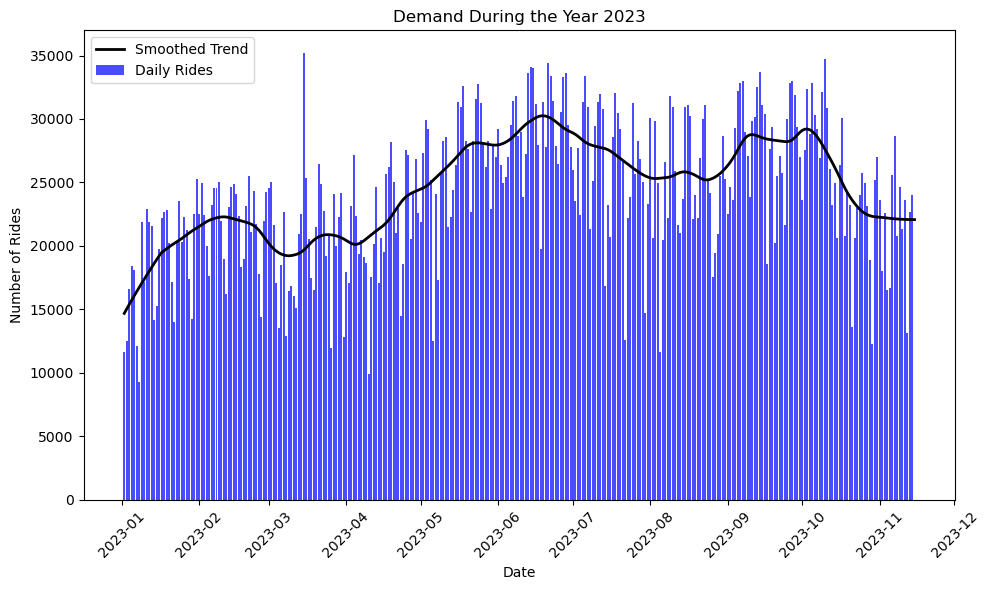

In [7]:
# examine demand over the entire time period of dataset
# extract the date from the "Start date" (without time) and create a new column for it
combined_df["Start date only"] = combined_df["Start date"].dt.date

# group the data by the new column and count the number of rides for each day
demand_per_day = combined_df.groupby("Start date only").size()

# convert dates to numeric values for LOWESS
x = np.arange(len(demand_per_day))
y = demand_per_day.values

# apply LOWESS smoothing
frac = 0.1  # determines the smoothness
smooth_y = lowess(y, x, frac = frac)

# plot results
plt.figure(figsize = (10,6)) 
plt.bar(demand_per_day.index, demand_per_day.values, color = "blue", alpha = 0.7, label = "Daily Rides")
plt.plot(demand_per_day.index, smooth_y[:, 1], color = "black", linewidth = 2, label = "Smoothed Trend")
plt.title("Demand During the Year 2023")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.xticks(rotation = 45)  
plt.legend()
plt.tight_layout()
plt.show()

#### Reading in Data and Dataframe Creation for Mid-Late June

In [8]:
# import data from June 19th-June 20th 2023
june_df = pd.read_csv("/Users/miagironda/Bike_Optimization_Project/data/375JourneyDataExtract19Jun2023-30Jun2023.csv")

# drop irrelevant columns
june_df = june_df.drop(columns = ["Number", "Start station number", "End station number", "Bike number", "Bike model", "Total duration", "Total duration (ms)"])

# display df
display(june_df)

,Start date,Start station,End date,End station
0,2023-06-30 23:59,"London Fields, Hackney Central",2023-07-01 00:27,"Dunston Road , Haggerston"
1,2023-06-30 23:59,"Westminster Pier, Westminster",2023-07-01 00:37,"Hereford Road, Bayswater"
2,2023-06-30 23:59,"Westminster Pier, Westminster",2023-07-01 00:36,"Hereford Road, Bayswater"
3,2023-06-30 23:59,"Halford Road, West Kensington",2023-07-01 00:10,"Montserrat Road , Putney"
4,2023-06-30 23:59,"Panton Street, West End",2023-07-01 00:09,"Vincent Street, Pimlico"
...,...,...,...,...
367256,2023-06-19 00:00,"Bonny Street, Camden Town",2023-06-19 00:04,"Bonny Street, Camden Town"
367257,2023-06-19 00:00,"Baylis Road, Waterloo",2023-06-19 00:38,"Alpha Grove, Millwall"
367258,2023-06-19 00:00,"Belford House, Haggerston",2023-06-19 00:25,"Kennington Road , Vauxhall"
367259,2023-06-19 00:01,"Vauxhall Walk, Vauxhall",2023-06-19 00:14,"Long Lane , Bermondsey"


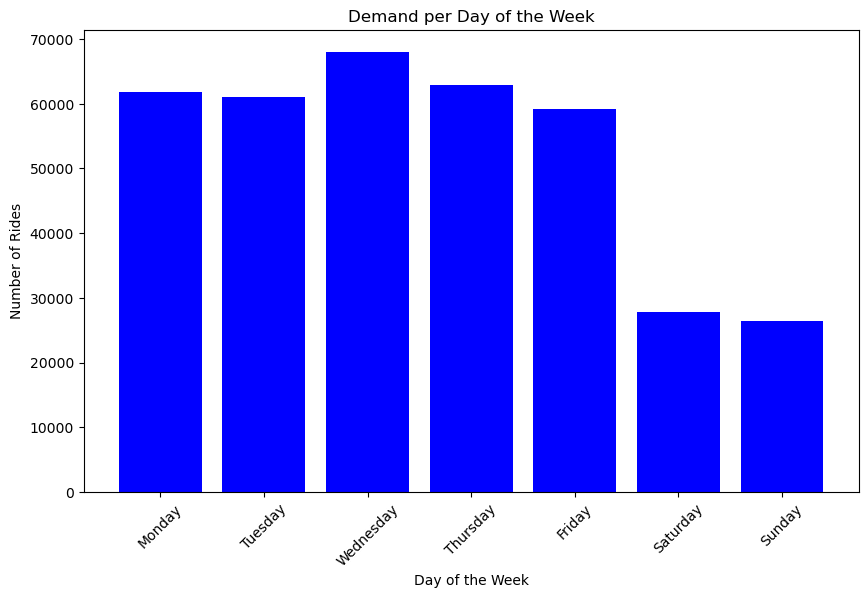

In [9]:
# examine demand per day of the week
# convert "Start date" and "End date" to datetime
june_df["Start date"] = pd.to_datetime(june_df['Start date'])
june_df['End date'] = pd.to_datetime(june_df['End date'])

# extract the days of the week from "Start date" and "End date" and create new columns for it
june_df = june_df.assign(**{
    "Start day of week": june_df["Start date"].dt.dayofweek,
    "End day of week": june_df["End date"].dt.dayofweek
})

# group the data by the new column and count the number of rides for each day
demand_per_day_of_week = june_df.groupby("Start day of week").size()

# assign names to the days of the week
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
demand_per_day_of_week.index = [days[i] for i in demand_per_day_of_week.index]

# plot results
plt.figure(figsize = (10, 6))
plt.bar(demand_per_day_of_week.index, demand_per_day_of_week.values, color = "blue")
plt.title("Demand per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Rides")
plt.xticks(rotation = 45)
plt.show()

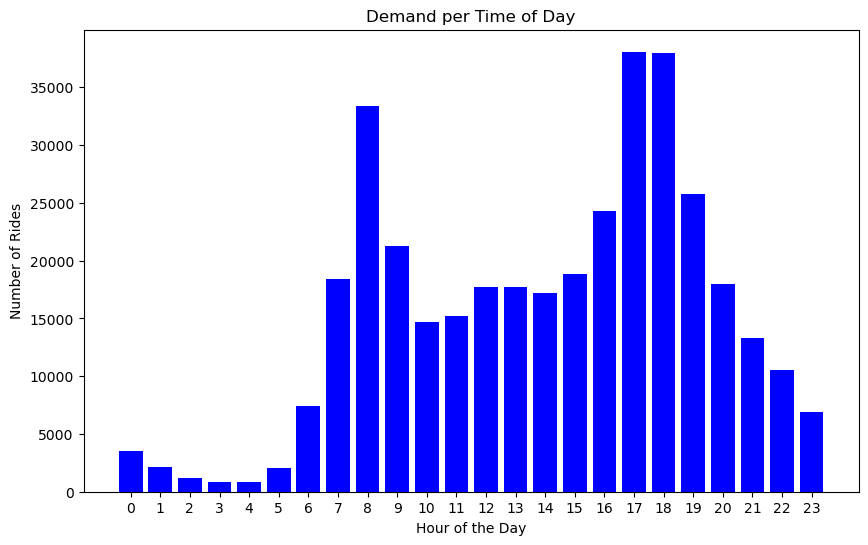

In [10]:
# examine demand per time of day
# extract the hour from 'Start date' and create a new column for it
june_df["Start hour"] = june_df["Start date"].dt.hour

# group the data by the new column and count the number of rides for each hour
demand_per_hour = june_df.groupby("Start hour").size()

# plot results
plt.figure(figsize = (10,6))
plt.bar(demand_per_hour.index, demand_per_hour.values, color = "blue")
plt.title("Demand per Time of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.xticks(range(0, 24))
plt.show()

#### Geographic Distribution of Demand

In [11]:
# examine demand distribution in the London area
# calculate net flow
# convert "Start date" and "End date" to pandas datetime
june_df["Start date"] = pd.to_datetime(june_df["Start date"])
june_df["End date"] = pd.to_datetime(june_df["End date"])

# extract date part from "Start date" and "End date"
june_df["Start day"] = june_df["Start date"].dt.date
june_df["End day"] = june_df["End date"].dt.date

# create two dataframes--one for starts and one for ends
starts = june_df[["Start station", "Start day"]].copy()
ends = june_df[["End station", "End day"]].copy()

# count bikes leaving each station for each day
start_counts = starts.groupby(["Start station", "Start day"]).size().reset_index(name = "Bikes Out")

# count bikes entering each station for each day
end_counts = ends.groupby(["End station", "End day"]).size().reset_index(name = "Bikes In")

# merge the counts on station and date
inflow_outflow_df = pd.merge(start_counts, end_counts, left_on = ["Start station", "Start day"], right_on = ["End station", "End day"], how = "outer")

# rename columns and data cleaning
inflow_outflow_df = inflow_outflow_df.rename(columns = {"Start station": "Station Name", "Start day": "Date"})
inflow_outflow_df["Station Name"] = inflow_outflow_df["Station Name"].combine_first(inflow_outflow_df["End station"])
inflow_outflow_df["Date"] = inflow_outflow_df["Date"].combine_first(inflow_outflow_df["End day"])
inflow_outflow_df = inflow_outflow_df[["Station Name", "Date", "Bikes Out", "Bikes In"]]

# convert "Date" to pandas datetime
inflow_outflow_df["Date"] = pd.to_datetime(inflow_outflow_df["Date"])

# Fill NaN values with 0 for Bikes Out and Bikes In
inflow_outflow_df["Bikes Out"] = inflow_outflow_df["Bikes Out"].fillna(0)
inflow_outflow_df["Bikes In"] = inflow_outflow_df["Bikes In"].fillna(0)

# Turn "Bikes In" and "Bikes Out" into integers
inflow_outflow_df["Bikes Out"] = inflow_outflow_df["Bikes Out"].astype(int)
inflow_outflow_df["Bikes In"] = inflow_outflow_df["Bikes In"].astype(int)

# calculate net flow
inflow_outflow_df["Net Flow"] = inflow_outflow_df["Bikes Out"] - inflow_outflow_df["Bikes In"]

# display df
display(inflow_outflow_df)

,Station Name,Date,Bikes Out,Bikes In,Net Flow
0,"Abbey Orchard Street, Westminster",2023-06-19,56,50,6
1,"Abbey Orchard Street, Westminster",2023-06-20,63,51,12
2,"Abbey Orchard Street, Westminster",2023-06-21,65,54,11
3,"Abbey Orchard Street, Westminster",2023-06-22,53,72,-19
4,"Abbey Orchard Street, Westminster",2023-06-23,35,35,0
...,...,...,...,...,...
9842,"York Way, Kings Cross",2023-06-26,35,30,5
9843,"York Way, Kings Cross",2023-06-27,30,30,0
9844,"York Way, Kings Cross",2023-06-28,31,38,-7
9845,"York Way, Kings Cross",2023-06-29,34,25,9


In [12]:
# note: the api is missing some stations contained in original dataframe and vice-versa
# access unified API to get geographic coords and station capacity
response = requests.get("https://api.tfl.gov.uk/BikePoint")

# check if the request was successful
if response.status_code == 200:
    data = response.json()
else:
    print("Failed to retrieve data")
    data = []

# initialize lists to store the extracted information
station_names = []
latitudes = []
longitudes = []
capacities = []

# get unique station names from inflow_outflow_df
inflow_outflow_stations = set(inflow_outflow_df["Station Name"])

# extract information
for station in data:
    common_name = station["commonName"]
    if common_name in inflow_outflow_stations:  # only get info for stations contained in inflow_outflow_df
        station_names.append(common_name)
        latitudes.append(station["lat"])
        longitudes.append(station["lon"])
        
        # extract capacity from additionalProperties
        capacity = None
        for prop in station["additionalProperties"]:
            if prop["key"] == "NbDocks":
                capacity = int(prop["value"])
                break
        capacities.append(capacity)

# create a new df
station_info_df = pd.DataFrame({
    "Station Name": station_names,
    "Latitude": latitudes,
    "Longitude": longitudes,
    "Station Capacity": capacities
})

# sort values by station name
station_info_df = station_info_df.sort_values(by = "Station Name")

# reset indexes
station_info_df.reset_index(drop = True, inplace = True)

# display df
display(station_info_df)

,Station Name,Latitude,Longitude,Station Capacity
0,"Abbey Orchard Street, Westminster",51.498125,-0.132102,29
1,"Abbotsbury Road, Holland Park",51.501391,-0.205991,24
2,"Aberdeen Place, St. John's Wood",51.524826,-0.176268,18
3,"Aberfeldy Street, Poplar",51.513548,-0.005659,16
4,"Abingdon Green, Westminster",51.497640,-0.125972,20
...,...,...,...,...
781,"Wren Street, Holborn",51.524564,-0.116279,33
782,"Wright's Lane, Kensington",51.500397,-0.193068,37
783,"Wynne Road, Stockwell",51.469217,-0.112686,25
784,"York Hall, Bethnal Green",51.528936,-0.055894,27


In [13]:
# merge dataframes
final_df = pd.merge(inflow_outflow_df, station_info_df, on = "Station Name", how = "inner")

# display final df
display(final_df)

,Station Name,Date,Bikes Out,Bikes In,Net Flow,Latitude,Longitude,Station Capacity
0,"Abbey Orchard Street, Westminster",2023-06-19,56,50,6,51.498125,-0.132102,29
1,"Abbey Orchard Street, Westminster",2023-06-20,63,51,12,51.498125,-0.132102,29
2,"Abbey Orchard Street, Westminster",2023-06-21,65,54,11,51.498125,-0.132102,29
3,"Abbey Orchard Street, Westminster",2023-06-22,53,72,-19,51.498125,-0.132102,29
4,"Abbey Orchard Street, Westminster",2023-06-23,35,35,0,51.498125,-0.132102,29
...,...,...,...,...,...,...,...,...
9662,"York Way, Kings Cross",2023-06-26,35,30,5,51.541596,-0.125441,24
9663,"York Way, Kings Cross",2023-06-27,30,30,0,51.541596,-0.125441,24
9664,"York Way, Kings Cross",2023-06-28,31,38,-7,51.541596,-0.125441,24
9665,"York Way, Kings Cross",2023-06-29,34,25,9,51.541596,-0.125441,24


In [14]:
# path to GeoJSON file
geojson_path = "/Users/miagironda/Bike_Optimization_Project/london_map/london_421.geojson"

with open(geojson_path, "r", encoding = "utf-8") as f:
    geojson_data = json.load(f)

# average net flow for each station over the year
station_summary = final_df.groupby("Station Name").agg({
    "Net Flow": "mean",
    "Latitude": "first",
    "Longitude": "first"
}).reset_index()

# categorize stations
def categorize_flow(net_flow):
    if net_flow < -1:
        return "Surplus"
    elif net_flow > 1:
        return "Deficit"
    else:
        return "Balanced"

# categorize the average net flow for each station over the year
station_summary["Category"] = station_summary["Net Flow"].apply(categorize_flow)

# count the number of stations in each category
category_counts = station_summary["Category"].value_counts()
print("Category Counts:")
print(category_counts)

# create a map centered around London
m = folium.Map(location = [51.509865, -0.118092], zoom_start = 11)

# add the GeoJSON data to the map
folium.GeoJson(
    geojson_data,
    style_function = lambda x: {"color": "black", "weight": 2, "fillOpacity": 0}
).add_to(m)

# color mapping for categories
color_map = {"Surplus": "green", "Deficit": "red", "Balanced": "gray"}

# add markers for each station
for idx, row in station_summary.iterrows():
    folium.CircleMarker(
        location = [row["Latitude"], row["Longitude"]],
        radius = 1,
        popup = f"Station: {row["Station Name"]}<br>Net Flow: {row["Net Flow"]:.2f}<br>Category: {row["Category"]}",
        color = color_map[row["Category"]],
        fill = True,
        fillColor = color_map[row["Category"]],
        fillOpacity = 1
    ).add_to(m)

# display map
m

Category Counts:
Category
Balanced    351
Deficit     238
Surplus     197
Name: count, dtype: int64
